<a href="https://colab.research.google.com/github/cosierlabs/geomapper_jupyter/blob/main/Geomapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installed Packages

In [ ]:
!pip install cartopy
!pip install hvplot
!pip install netCDF4 xarray
!pip install metpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.9/409.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.1 MB/s eta 0:00:00


NetCDF Global Sea Surface Temperature map visualization.

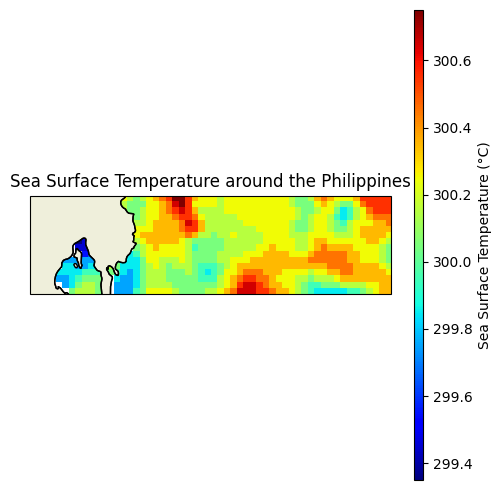

In [ ]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import firebase_admin
from firebase_admin import credentials, firestore
import json
import xarray as xr
import numpy as np
from metpy.cbook import get_test_data


dataset = xr.open_dataset('20190210000000-NAVO-L4_GHRSST-SST1m-K10_SST-GLOB-v02.0-fv01.0.nc4')
ds_var = dataset.metpy.parse_cf('analysed_sst')

# lat = dataset.lat.values
# lon = dataset.lon.values
# sst = dataset['analysed_sst'].isel(time=0).values - 273.15

lat_min, lat_max = 6.5, 8.0
lon_min, lon_max = 125.0, 130.5

# Filtering the variable and coordinates
filtered_sst_data = dataset['analysed_sst'].isel(time=0).sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max)).values
filtered_lat = dataset['lat'].sel(lat=slice(lat_max, lat_min)).values
filtered_lon = dataset['lon'].sel(lon=slice(lon_min, lon_max)).values

# Plotting the geospatial map
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title('Sea Surface Temperature around the Philippines')
im_sst = ax.imshow(filtered_sst_data, extent=(lon_min, lon_max, lat_min, lat_max),
                   cmap='jet', origin='upper', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, zorder=1)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

cbar_sst = plt.colorbar(im_sst, ax=ax, orientation='vertical', pad=0.05, aspect=50)
cbar_sst.set_label('Sea Surface Temperature (°C)')

plt.tight_layout()
plt.show()

# lat = ds_var.lat.values
# lon = ds_var.lon.values
# sst = ds_var.isel(time=0).values - 273.15

# print("Dataset Information:")
# print(ds_var)

TO IDENTIFY VARIABLES NAMES AND DIMENSIONS

In [ ]:
# for var_names in dataset.data_vars:
#   variable = dataset[var_names]
#   print(f"\nVariable: {var_names}")
#   print(f"\nDimensions: {variable.dims}")
#   print(f"Shape: {variable.shape}")

#   print(f"Sample data: {variable.values[:5]}")

# TO CHECK FOR NAN VALUES IN SST DATA

# print("Check for NaN values in SST Data...")
# nan_count = xr.DataArray(sst).isnull().sum()
# total_count = sst.size
# valid_count = total_count - nan_count

# print(f"Total SST Data points: {total_count}")
# print(f"Valid SST data points: {valid_count}")
# print(f"NaN SST data points: {nan_count}")

OLD CODE

In [ ]:
# "5" resembles the tile size
# for lat_start in range(int(min(lat)), int(max(lat)), 5):
#     for lon_start in range(int(min(lon)), int(max(lon)), 5):
#         lat_end = lat_start + 5
#         lon_end = lon_start + 5

#         # Segment the data
#         segment = {
#             'lat': [l for l in lat if lat_start <= l < lat_end],
#             'lon': [l for l in lon if lon_start <= l < lon_end],
#             'sst': [
#                 row[lon.index(lon_start):lon.index(lon_end)]
#                 for row in sst[lat.index(lat_start):lat.index(lat_end)]
#             ],
#         }
#         # print(f"Tile {lat_start}°-{lat_end}°, {lon_start}°-{lon_end}°:")
#         # print(segment)
#         # print("\n" + "=" * 40 + "\n")

#         # Plot the segment on the map
#         # fig = plt.figure(figsize=(10, 10))
#         # ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#         # ax.set_extent([lon_start, lon_end, lat_start, lat_end], crs=ccrs.PlateCarree())

#         # mp = ax.imshow(segment['sst'], extent=(lon_start, lon_end, lat_start, lat_end),
#         #                cmap='jet', origin='upper', transform=ccrs.PlateCarree())
#         # ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
#         # ax.add_feature(cfeature.COASTLINE, zorder=1)

#         # cbar = plt.colorbar(mp, orientation='vertical', pad=0.05, aspect=50)
#         # cbar.set_label('Sea Surface Temperature (°C)')
#         # plt.title(f'Sea Surface Temperature\nTile: {lat_start}°-{lat_end}°, {lon_start}°-{lon_end}°')
#         # plt.show()

#         # Break after the first tile for demonstration
#         break
#     break


# with open('sst_data.json', 'w') as outfile:
#   json.dump(map_data,outfile)

# cred = credentials.Certificate('geomapper-d2b26-firebase-adminsdk-ee6he-afa0190bb3.json')
# firebase_admin.initialize_app(cred)
# db = firestore.client()

# doc_ref = db.collection('SSTData').document('SST_Map')
# doc_ref.set(map_data)

In [ ]:
# import netCDF4 as nc
# import numpy as np
# import xarray as xr
# import hvplot.xarray
# import matplotlib.pyplot as plt
# import cartopy.crs as crs
# import cartopy.feature as cfeature

# dataset = nc.Dataset('20190210000000-NAVO-L4_GHRSST-SST1m-K10_SST-GLOB-v02.0-fv01.0.nc4', mode='r')

# latitude = dataset.variables['lat'][:]
# longitude = dataset.variables['lon'][:]
# seasurface_temp = dataset.variables['analysed_sst'][0, :, :]

# sst_celcius = seasurface_temp - 273.15

# plt.figure(figsize=(8,8))
# ax = plt.axes(projection=crs.PlateCarree())

# ax.set_extent([120, 130, 5, 10], crs=crs.PlateCarree())
# ax.coastlines(resolution='110m')
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAND, color='green')
# ax.add_feature(cfeature.OCEAN, color='lightblue')


# lon, lat = np.meshgrid(longitude, latitude)

# sst_plot = ax.pcolormesh(lon, lat, sst_celcius, cmap='coolwarm', transform=crs.PlateCarree())

# cbar = plt.colorbar(sst_plot, orientation='horizontal', pad=0.07)
# cbar.set_label('Sea Surface Temperature (°C)')
# plt.title('Global Sea Surface Temperature')
# plt.show()

